In [821]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, f1_score

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Populating the interactive namespace from numpy and matplotlib


In [742]:
def prepare_data(filename, scaler, cv_splits=10):
    data = pd.read_csv(filename)
    print("Data types:")
    print(data.dtypes, data.shape)
    data_features, data_labels = data.drop('class', axis=1), data['class']
    data_features_train, data_features_test, data_labels_train, data_labels_test = train_test_split(data_features, 
                                                                                        data_labels, 
                                                                                        train_size=0.7, 
                                                                                        test_size=0.3,
                                                                                        stratify=data_labels,
                                                                                        random_state=9)
    data_features_train_scaled = scaler.fit_transform(data_features_train)
    data_features_test_scaled = scaler.fit_transform(data_features_test)
    print("Train data size:{},{}".format(data_features_train.shape, data_labels_train.shape))
    print("Test data size:{},{}".format(data_features_test.shape, data_labels_test.shape))
    
    print('Creating K-fold CV split..')
    k_fold = StratifiedKFold(n_splits=cv_splits, random_state=9)
    
    plt.title("Class distributions")
    plt.bar(range(len(data_labels.value_counts())), data_labels.value_counts().values.tolist())
    plt.xticks(range(len(data_labels.value_counts())), data_labels.value_counts().index.tolist())
    plt.show()
    
    return data, data_features_train_scaled, data_features_test_scaled, data_labels_train, data_labels_test, k_fold

Data types:
preg       int64
plas       int64
pres       int64
skin       int64
insu       int64
mass     float64
pedi     float64
age        int64
class     object
dtype: object (768, 9)
Train data size:(537, 8),(537,)
Test data size:(231, 8),(231,)
Creating K-fold CV split..


c:\users\user\appdata\local\conda\conda\envs\tf\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\conda\conda\envs\tf\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\user\appdata\local\conda\conda\envs\tf\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\conda\conda\envs\tf\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


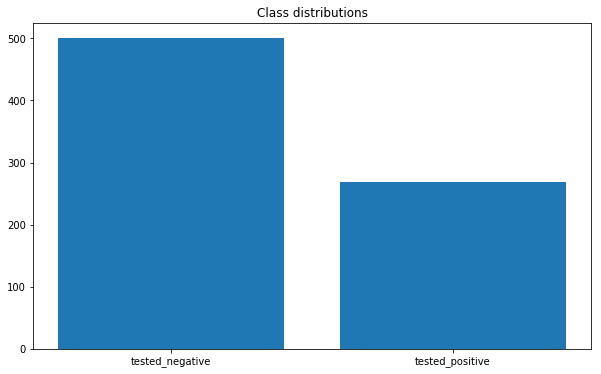

In [743]:
diabetes_data, diabetes_features_train, diabetes_features_test, diabetes_labels_train, diabetes_labels_test, k_fold = prepare_data('diabetes.csv', 
                                                                                                                           scaler=StandardScaler())

In [744]:
diabetes_data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


### Baseline Linear SVM Classifier

In [745]:
linear_svm = LinearSVC(C=1)
linear_svm.fit(diabetes_features_train, diabetes_labels_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [746]:
diabetes_pred = linear_svm.predict(diabetes_features_test)

In [747]:
print("Accuracy: {:.3f}".format(accuracy_score(diabetes_labels_test, diabetes_pred)))

Accuracy: 0.775


In [748]:
print('Classification report for test data.')
print(classification_report(diabetes_labels_test, y_pred, 
                            target_names=diabetes_labels_test.value_counts().index.tolist()))

Classification report for test data.
                 precision    recall  f1-score   support

tested_negative       0.68      0.80      0.73       150
tested_positive       0.44      0.30      0.36        81

      micro avg       0.62      0.62      0.62       231
      macro avg       0.56      0.55      0.54       231
   weighted avg       0.60      0.62      0.60       231



### Linear SVM Grid Search

In [758]:
svm_param_list = {
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100]
}
svm_param_list_tuned = {
    'C': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.07, 1.0]
}

In [750]:
#scoring = {'F1': make_scorer(f1_score, pos_label='tested_positive'), 'Accuracy': make_scorer(accuracy_score)}

In [759]:
opt_svm_model = GridSearchCV(estimator=linear_svm, param_grid=svm_param_list_tuned, cv=k_fold.split(diabetes_features_train, 
                                                                                          diabetes_labels_train),
                                           scoring=make_scorer(accuracy_score))

In [760]:
opt_svm_model.fit(diabetes_features_train, diabetes_labels_train)

c:\users\user\appdata\local\conda\conda\envs\tf\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\conda\conda\envs\tf\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\conda\conda\envs\tf\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\conda\conda\envs\tf\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\conda\conda\envs\tf\lib\site-packages\sklearn\svm\base.py:922: C

GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000219FB617EB8>,
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.07, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [761]:
opt_svm_model.best_estimator_

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [762]:
print('Best parameters found: {}'.format(opt_svm_model.best_params_))
print('Best training score: {:.3f}'.format(opt_svm_model.best_score_))

Best parameters found: {'C': 0.01}
Best training score: 0.773


In [763]:
diabetes_pred = opt_svm_model.predict(diabetes_features_test)

In [764]:
print('Best test accuracy: {:.3f}'.format(opt_svm_model.score(diabetes_features_test, diabetes_labels_test)))

Best test accuracy: 0.779


In [765]:
print('Classification report for test data.')
print(classification_report(diabetes_labels_test, diabetes_pred, 
                            target_names=diabetes_labels_test.value_counts().index.tolist()))

Classification report for test data.
                 precision    recall  f1-score   support

tested_negative       0.79      0.90      0.84       150
tested_positive       0.75      0.56      0.64        81

      micro avg       0.78      0.78      0.78       231
      macro avg       0.77      0.73      0.74       231
   weighted avg       0.78      0.78      0.77       231



In [766]:
def plot_confusion_matrix(labels_test, labels_pred, target_names):
    print('Confusion matrix for test data.')
    cm = confusion_matrix(labels_test, labels_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + target_names.tolist())
    ax.set_yticklabels([''] + target_names.tolist())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Confusion matrix for test data.


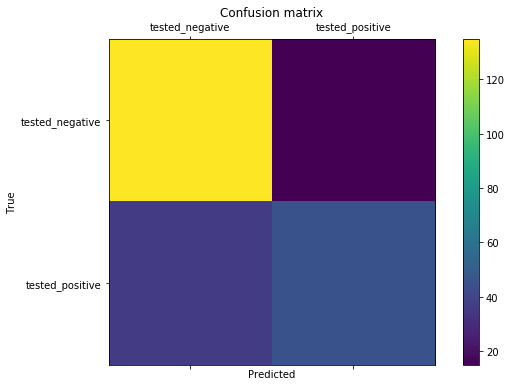

In [767]:
plot_confusion_matrix(diabetes_labels_test, diabetes_pred, diabetes_labels_test.value_counts().index)

### Kernel SVM Grid Search

In [786]:
ksvm_param_list = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}
ksvm_param_list_tuned = {
    'C': [10, 13, 16, 19, 22, 25, 28, 32, 36, 40, 45],
    'gamma': [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.007, 0.009]
}

In [787]:
kernel_svm = SVC()
kernel_svm.fit(diabetes_features_train, diabetes_labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [788]:
opt_svm_model = GridSearchCV(estimator=kernel_svm, param_grid=ksvm_param_list_tuned, cv=k_fold.split(diabetes_features_train, 
                                                                                          diabetes_labels_train),
                                           scoring=make_scorer(accuracy_score))

In [789]:
opt_svm_model.fit(diabetes_features_train, diabetes_labels_train)

c:\users\user\appdata\local\conda\conda\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000219FDDAA6D0>,
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [10, 13, 16, 19, 22, 25, 28, 32, 36, 40, 45], 'gamma': [1e-05, 0.0001, 0.0005, 0.001, 0.005, 0.007, 0.009]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [811]:
opt_svm_model.best_estimator_

SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [812]:
print('Best parameters found: {}'.format(opt_svm_model.best_params_))
print('Best training score: {:.3f}'.format(opt_svm_model.best_score_))

Best parameters found: {'C': 25, 'gamma': 0.005}
Best training score: 0.777


In [813]:
diabetes_pred = opt_svm_model.predict(diabetes_features_test)

In [814]:
print('Best test accuracy: {:.3f}'.format(opt_svm_model.score(diabetes_features_test, diabetes_labels_test)))
print('Classification report for test data.')
print(classification_report(diabetes_labels_test, diabetes_pred, 
                            target_names=diabetes_labels_test.value_counts().index.tolist()))

Best test accuracy: 0.771
Classification report for test data.
                 precision    recall  f1-score   support

tested_negative       0.79      0.89      0.83       150
tested_positive       0.73      0.56      0.63        81

      micro avg       0.77      0.77      0.77       231
      macro avg       0.76      0.72      0.73       231
   weighted avg       0.77      0.77      0.76       231



Confusion matrix for test data.


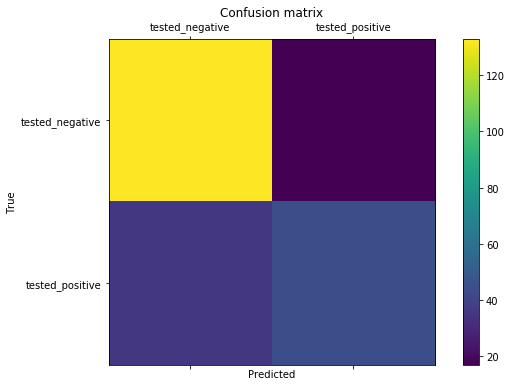

In [815]:
plot_confusion_matrix(diabetes_labels_test, diabetes_pred, diabetes_labels_test.value_counts().index)

### Random Forest Classifier

In [803]:
rf_param_list = {
    'max_depth': [2, 5, 20, 50, 100],
    'n_estimators': [100, 200, 500, 1000]
}
rf_param_list_tuned = {
    'max_depth': [1, 2, 5, 7, 10, 12, 15],
    'n_estimators': [250, 300, 350, 400, 450, 500, 600, 700, 800]
}

In [804]:
random_forest = RandomForestClassifier()
opt_model = GridSearchCV(estimator=random_forest, param_grid=rf_param_list_tuned, cv=k_fold.split(diabetes_features_train, 
                                                                                          diabetes_labels_train),
                                           scoring=make_scorer(accuracy_score))

In [805]:
opt_model.fit(diabetes_features_train, diabetes_labels_train)

c:\users\user\appdata\local\conda\conda\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000219FB617830>,
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 5, 7, 10, 12, 15], 'n_estimators': [250, 300, 350, 400, 450, 500, 600, 700, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [816]:
opt_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [817]:
print('Best parameters found: {}'.format(opt_model.best_params_))
print('Best training score: {:.3f}'.format(opt_model.best_score_))

Best parameters found: {'max_depth': 5, 'n_estimators': 250}
Best training score: 0.775


In [818]:
diabetes_pred = opt_model.predict(diabetes_features_test)

In [819]:
print('Best test accuracy: {:.3f}'.format(opt_model.score(diabetes_features_test, diabetes_labels_test)))
print('Classification report for test data.')
print(classification_report(diabetes_labels_test, diabetes_pred, 
                            target_names=diabetes_labels_test.value_counts().index.tolist()))

Best test accuracy: 0.788
Classification report for test data.
                 precision    recall  f1-score   support

tested_negative       0.80      0.89      0.85       150
tested_positive       0.75      0.59      0.66        81

      micro avg       0.79      0.79      0.79       231
      macro avg       0.78      0.74      0.75       231
   weighted avg       0.78      0.79      0.78       231



Confusion matrix for test data.


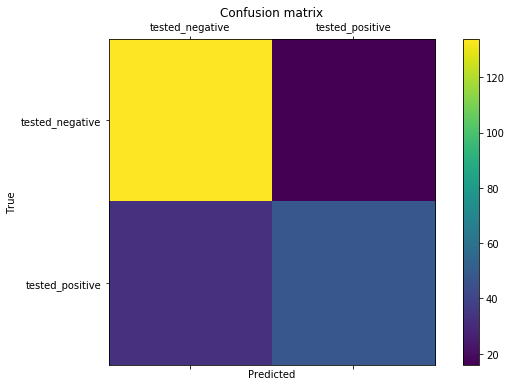

In [820]:
plot_confusion_matrix(diabetes_labels_test, diabetes_pred, diabetes_labels_test.value_counts().index)

### XGBoost Classifier

In [852]:
xgb_param_list = {
    'n_estimators': [50, 100, 250, 500, 1000],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
}
xgb_param_list_tuned = {
    'subsample': [0.6],
    'n_estimators': [2, 5, 10, 20, 35, 50, 75],
}

In [853]:
xgboost = GradientBoostingClassifier()
opt_model = GridSearchCV(estimator=xgboost, param_grid=xgb_param_list_tuned, cv=k_fold.split(diabetes_features_train, 
                                                                                          diabetes_labels_train),
                                           scoring=make_scorer(accuracy_score))

In [854]:
opt_model.fit(diabetes_features_train, diabetes_labels_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x00000219FB6D7308>,
       error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'subsample': [0.6], 'n_estimators': [2, 5, 10, 20, 35, 50, 75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [855]:
opt_model.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.6, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [856]:
print('Best parameters found: {}'.format(opt_model.best_params_))
print('Best training score: {:.3f}'.format(opt_model.best_score_))

Best parameters found: {'n_estimators': 20, 'subsample': 0.6}
Best training score: 0.765


In [857]:
diabetes_pred = opt_model.predict(diabetes_features_test)

In [858]:
print('Best test accuracy: {:.3f}'.format(opt_model.score(diabetes_features_test, diabetes_labels_test)))
print('Classification report for test data.')
print(classification_report(diabetes_labels_test, diabetes_pred, 
                            target_names=diabetes_labels_test.value_counts().index.tolist()))

Best test accuracy: 0.766
Classification report for test data.
                 precision    recall  f1-score   support

tested_negative       0.78      0.89      0.83       150
tested_positive       0.72      0.54      0.62        81

      micro avg       0.77      0.77      0.77       231
      macro avg       0.75      0.71      0.73       231
   weighted avg       0.76      0.77      0.76       231



Confusion matrix for test data.


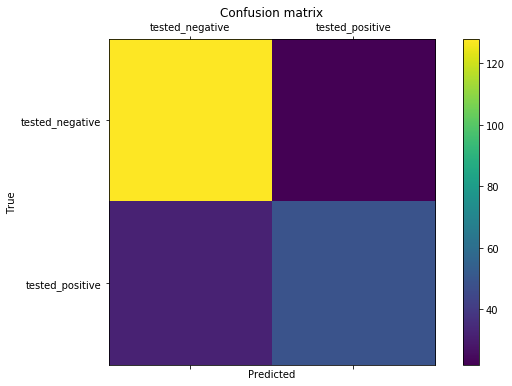

In [851]:
plot_confusion_matrix(diabetes_labels_test, diabetes_pred, diabetes_labels_test.value_counts().index)